Author: Febe Jovita

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [ ]:
df_dataset = pd.read_csv('loan_customer.csv')
df_dataset.sample(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
391,LP002243,1995-06-23,6.281173e+11,Male,Yes,0,Not Graduate,No,3010.0,3136.0,110000,360,30,0.0,NaN,house,REJECT
493,LP002555,1994-07-22,6.285666e+11,Male,Yes,2,Graduate,Yes,4583.0,2083.0,160000,360,30,1.0,NaN,apartment,APPROVE
88,LP001289,1979-08-10,6.287790e+11,Male,No,0,Graduate,No,8566.0,0.0,210000,360,30,1.0,NaN,house,APPROVE
254,LP001843,1987-12-13,6.281108e+10,Male,Yes,1,Not Graduate,No,2661.0,7101.0,279000,180,15,1.0,NaN,apartment,APPROVE
480,LP002527,1987-08-05,6.285605e+11,Male,Yes,2,Graduate,Yes,16525.0,1014.0,150000,360,30,1.0,NaN,studio,APPROVE
69,LP001241,1978-01-31,6.285741e+11,Female,No,0,Graduate,No,4300.0,0.0,136000,360,30,0.0,NaN,apartment,REJECT
73,LP001250,2000-06-16,6.285773e+11,Male,Yes,3+,Not Graduate,No,4755.0,0.0,95000,360,30,0.0,NaN,apartment,REJECT
154,LP001532,1984-03-24,6.285700e+10,Male,Yes,2,Not Graduate,No,2281.0,0.0,113000,360,30,1.0,NaN,studio,REJECT
544,LP002740,1995-06-17,NaN,Male,Yes,3+,Graduate,No,6417.0,0.0,157000,180,15,1.0,NaN,studio,APPROVE
26,LP001068,1986-09-10,6.281377e+11,Male,Yes,0,Graduate,No,2799.0,2253.0,122000,360,30,1.0,no,apartment,APPROVE


# Data Cleansing

Check dataset

In [ ]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

Explore initial dataset

In [ ]:
df_dataset.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.690000e+02,612.000000,621.000000,621.000000,621.000000,621.000000,570.000000
mean,5.468552e+11,5681.549020,1616.874267,145133.655395,342.608696,28.550725,0.842105
std,1.987860e+11,9056.454103,2915.075138,84011.115879,64.090837,5.340903,0.364963
min,6.281101e+10,150.000000,0.000000,9000.000000,12.000000,1.000000,0.000000
25%,6.281140e+11,2874.500000,0.000000,100000.000000,360.000000,30.000000,1.000000
50%,6.281343e+11,3812.500000,1167.000000,125000.000000,360.000000,30.000000,1.000000
75%,6.285665e+11,5815.750000,2302.000000,165000.000000,360.000000,30.000000,1.000000
max,6.287799e+11,170578.000000,41667.000000,700000.000000,480.000000,40.000000,1.000000


## Handling missing values

> Indented block



In [ ]:
interest = ['gender','property_type','married','loan_term_year']
df_dataset[interest].dropna()

,gender,property_type,married,loan_term_year
0,Male,house,No,30
1,Male,studio,Yes,30
2,Male,house,Yes,30
3,Male,house,Yes,30
4,Male,house,No,30
...,...,...,...,...
616,Female,studio,No,30
617,Male,studio,Yes,15
618,Male,house,Yes,30
619,Male,house,Yes,30


## Handling duplicated data

In [ ]:
df_dataset[interest].drop_duplicates()

,gender,property_type,married,loan_term_year
0,Male,house,No,30
1,Male,studio,Yes,30
2,Male,house,Yes,30
7,Male,apartment,Yes,30
13,Male,studio,No,30
14,Male,house,Yes,10
16,Male,house,No,20
17,Female,house,No,30
23,NaN,studio,Yes,30
29,Female,apartment,No,30


## Handling Outlier

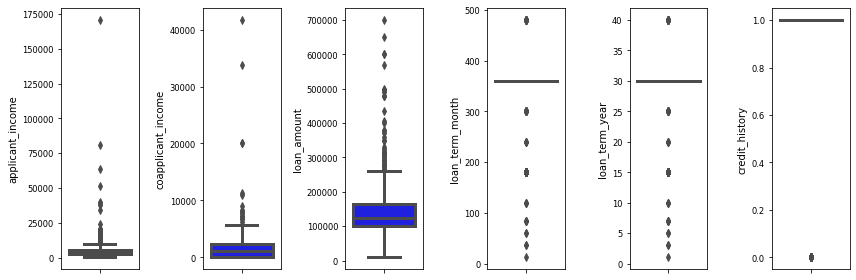

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 4)
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'small'
rcParams['ytick.labelsize'] = 'small'

nums = ['applicant_income',	'coapplicant_income',	'loan_amount',	'loan_term_month',	'loan_term_year',	'credit_history']

for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_dataset[nums[i]], color='blue', orient='v')
    plt.tight_layout()


## Feature Encoding

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

In [ ]:
df_dataset.groupby(['property_type', 'gender'])['property_type'].count()

property_type  gender
apartment      Female     55
               Male      174
house          Female     34
               Male      169
studio         Female     24
               Male      151
Name: property_type, dtype: int64

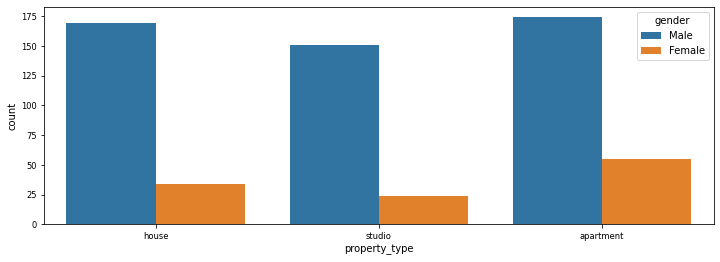

In [ ]:
sns.countplot(data=df_dataset, x='property_type', hue='gender')

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

In [ ]:
df_dataset.groupby(['loan_term_year', 'married'])['married'].count()

loan_term_year  married
1               Yes          1
3               No           2
5               No           1
                Yes          1
7               Yes          4
10              No           1
                Yes          2
15              No           8
                Yes         36
20              No           1
                Yes          2
25              No           3
                Yes         10
30              No         190
                Yes        342
40              No           9
                Yes          5
Name: married, dtype: int64

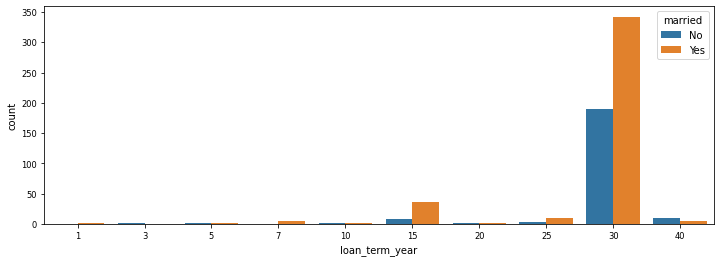

In [ ]:
sns.countplot(data=df_dataset, x='loan_term_year', hue='married')